# Linear Regression Example
This notebook reproduces the plots from the lecture slides about linear regression. This uses mainly pure Python and Numpy code without any additional machine learning libraries

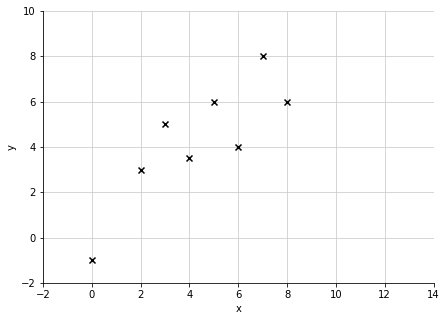

In [1]:
import matplotlib.patches as patches
import numpy as np
import pylab as pl
%matplotlib inline

#toy data
x = np.array([0,2,3,4,5,6,7,8])
y = np.array([-1, 3, 5, 3.5, 6, 4, 8, 6])

#create design matrix X including rows of 1's for bias
X = np.column_stack([np.ones(len(x)),x])

#generate figure
fig = pl.figure(figsize=(7,5))
ax = fig.add_subplot(111)
#Scatter Plot
ax.scatter(x,y,marker="x",zorder=100,color="k")
#Set axis labels
ax.set_xlabel("x")
ax.set_ylabel("y")
#Set axis limits
ax.set_ylim(-2,10)
ax.set_xlim(-2,14)
#show grid in grey and set top and right axis to invisible
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## Try out some beta values, fit model, compute l2-loss and plot data

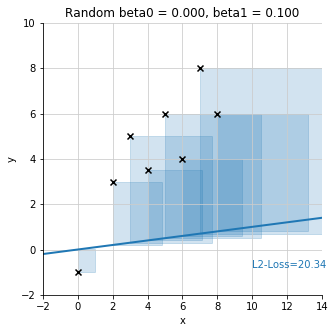

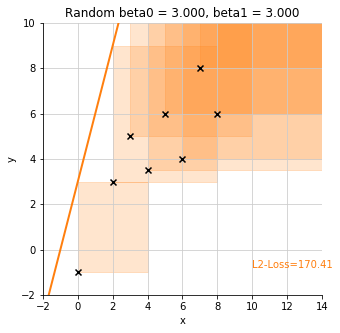

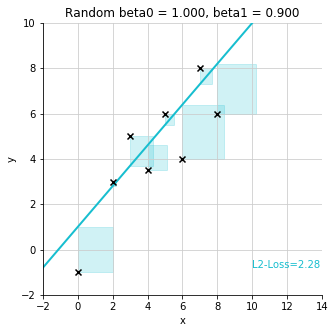

In [2]:
#compute l2-loss
def l2loss(X,y,betas):
    return (np.dot(X,betas)-y)**2

def emperical_risk_l2(betas,X,y):
    return 1/len(y) * l2loss(X,y,betas).sum()

for b0,b1,c in zip([0,3,1],[0.1,3,0.9],["tab:blue","tab:orange","tab:cyan"]):
    #generate figure
    fig = pl.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    pl.title("Random beta0 = %.3f, beta1 = %.3f" % (b0,b1))


    #plot toy data 
    ax.scatter(x,y,marker="x",zorder=100,color="k")
    ax.set_ylim(-2,10)
    ax.set_xlim(-2,14)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    #generate some x data to plot linear model for random betas
    n = 10000
    xp = np.column_stack([np.ones(n),np.linspace(-2,14,n)])
    #select some betas
    betas = np.array([b0,b1])
    yp = np.dot(xp,betas)
    ax.plot(xp[:,1],yp,linewidth=2,color=c)
    ax.grid(color="#CCCCCC")

    #Compute loss for random betas
    loss_v = l2loss(X,y,betas)
    sse = emperical_risk_l2(betas,X,y)
    #print("L2-Loss: " + str(sse))
    #Add text to plot
    ax.text(10,-0.8,"L2-Loss=%.2f" % (sse),color=c)

    for i in range(len(loss_v)):
        # Create a Rectangle patch
        rect = patches.Rectangle((x[i],y[i]),np.abs(np.dot(X,betas)[i]-y[i]),np.dot(X,betas)[i]-y[i],linewidth=1,
                                 edgecolor=c,facecolor=c,alpha=0.2)
        # Add the patch to the Axes
        ax.add_patch(rect)



# Estimate optimal $\beta$ values and plot model
$\hat \beta$ can be estimated in closed form:
\begin{equation}
\boldsymbol{\hat \beta} = \left( \boldsymbol X^\top \boldsymbol X \right)^{-1} \boldsymbol X^\top \boldsymbol y
\end{equation}

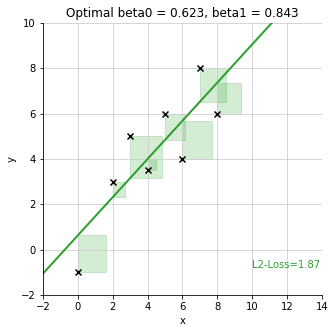

In [3]:
#compute l2-loss
def l2loss(X,y,betas):
    return (np.dot(X,betas)-y)**2

def emperical_risk_l2(betas,X,y):
    return 1/len(y) * l2loss(X,y,betas).sum()

#generate figure
fig = pl.figure(figsize=(5,5))
ax = fig.add_subplot(111)

#plot toy data 
ax.scatter(x,y,marker="x",zorder=100,color="k")
ax.set_ylim(-2,10)
ax.set_xlim(-2,14)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#generate some x data to plot linear model for random betas
n = 10000
xp = np.column_stack([np.ones(n),np.linspace(-2,14,n)])
#estimate optimal betas
betas = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)
#estimate y values for regression line
yp = np.dot(xp,betas)
ax.plot(xp[:,1],yp,linewidth=2,color="tab:green")
ax.grid(color="#CCCCCC")
pl.title("Optimal beta0 = %.3f, beta1 = %.3f" % (betas[0],betas[1]))

#Compute loss for random betas
loss_v = l2loss(X,y,betas)
sse = emperical_risk_l2(betas,X,y)
#print("L2-Loss: " + str(sse))
#Add text to plot
ax.text(10,-0.8,"L2-Loss=%.2f" % (sse),color="tab:green")

for i in range(len(loss_v)):
    # Create a Rectangle patch
    rect = patches.Rectangle((x[i],y[i]),np.abs(np.dot(X,betas)[i]-y[i]),np.dot(X,betas)[i]-y[i],linewidth=1,
                             edgecolor="tab:green",facecolor="tab:green",alpha=0.2)
    # Add the patch to the Axes
    ax.add_patch(rect)



## 3D Surface of L2-Loss

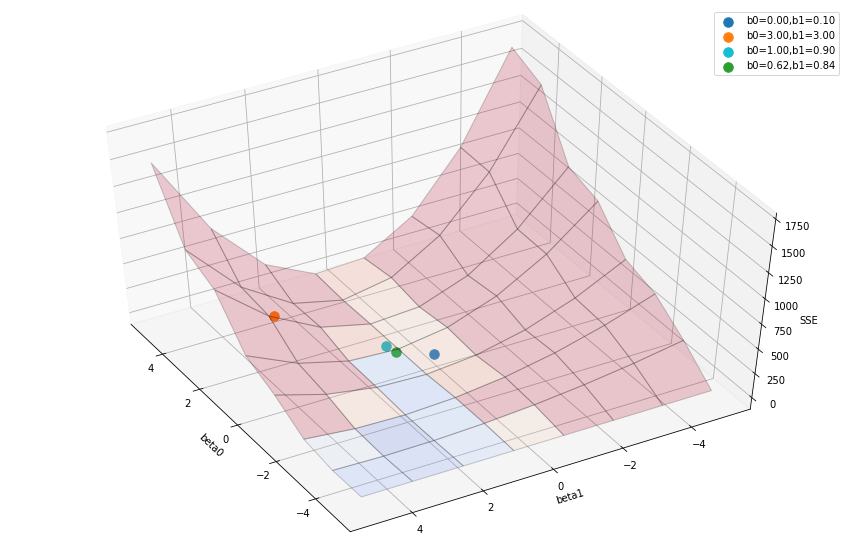

In [4]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly.tools as tls
init_notebook_mode(connected=True)

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib as mlp

#create grid of beta0 and beta1 values
n = len(x)
betas0 = np.linspace(-5,5,n)
betas1 = np.linspace(-5,5,n)
betas0, betas1 = np.meshgrid(betas0, betas1)

#compute l2-loss surface
losses = ((betas0+betas1*x)-y)**2

fig = pl.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(betas0,betas1,losses,alpha=0.2,cmap="coolwarm",vmin=0,vmax=50,edgecolor="k",zorder=-10)
ax.set_xlabel("beta0")
ax.set_ylabel("beta1")
ax.set_zlabel("SSE")
ax.view_init(50, 150)

#add three example points from the losses before
for b0,b1,c in zip([0,3,1,0.623],[0.1,3,0.9,0.843],["tab:blue","tab:orange","tab:cyan","tab:green"]):
    loss = emperical_risk_l2(np.array([b0,b1]),X,y)
    ax.scatter(b0,b1,loss,color=c,edgecolor=c,s=90,zorder=100000,label="b0=%.2f,b1=%.2f" % (b0,b1))
pl.legend()

## L1 vs. L2 without Outlier

[0.96248616 0.81868313]


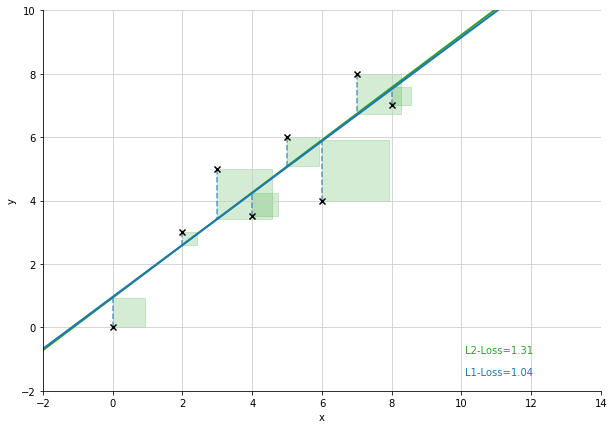

In [23]:
from scipy.optimize import minimize

#toy data
x = np.array([0,2,3,4,5,6,7,8])
y = np.array([0, 3, 5, 3.5, 6, 4, 8, 7])

#create design matrix X including rows of 1's for bias
X = np.column_stack([np.ones(len(x)),x])

#compute l2-loss
def l2loss(X,y,betas):
    return (np.dot(X,betas)-y)**2

def emperical_risk_l2(betas,X,y):
    return 1/len(y) * l2loss(X,y,betas).sum()

#compute l1-loss
def l1loss(X,y,betas):
    return np.absolute(np.dot(X,betas)-y)

def emperical_risk_l1(betas,X,y):
    return 1/len(y) * l1loss(X,y,betas).sum()

#generate figure
fig = pl.figure(figsize=(10,7))
ax = fig.add_subplot(111)

#plot toy data 
ax.scatter(x,y,marker="x",zorder=100,color="k")
ax.set_ylim(-2,10)
ax.set_xlim(-2,14)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#generate some x data to plot linear model for random betas
n = 10000
xp = np.column_stack([np.ones(n),np.linspace(-2,14,n)])
#estimate optimal betas using l2-loss
betas = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)
#estimate y values for regression line
yp = np.dot(xp,betas)
ax.plot(xp[:,1],yp,linewidth=2,color="tab:green")
ax.grid(color="#CCCCCC")
#pl.title("Optimal beta0 = %.3f, beta1 = %.3f" % (betas[0],betas[1]))

#Compute loss for random betas
loss_v = l2loss(X,y,betas)
sse = emperical_risk_l2(betas,X,y)
#Add text to plot
ax.text(10.1,-0.8,"L2-Loss=%.2f" % (sse),color="tab:green")

for i in range(len(loss_v)):
    # Create a Rectangle patch
    rect = patches.Rectangle((x[i],y[i]),np.abs(np.dot(X,betas)[i]-y[i]),np.dot(X,betas)[i]-y[i],linewidth=1,
                             edgecolor="tab:green",facecolor="tab:green",alpha=0.2)
    # Add the patch to the Axes
    ax.add_patch(rect)


#plot l1-loss
#estimate optimal betas using l1-loss and numerical solver conjugate gradient
#initialize some start betas
betas = np.array([1,1])
result = minimize(emperical_risk_l1, betas, args=(X,y),
                  method='CG', options={'maxiter': 500})

betas_hat = result.x
l1losses = l1loss(X,y,betas_hat)
l1 = emperical_risk_l1(betas_hat,X,y)

#estimate y values for regression line
yp = np.dot(xp,betas_hat)
ax.plot(xp[:,1],yp,linewidth=2,color="tab:blue")
ax.grid(color="#CCCCCC")

#Add text to plot
ax.text(10.1,-1.5,"L1-Loss=%.2f" % (l1),color="tab:blue")

for i in range(len(l1losses)):
    dist = l1losses[i]
    if y[i]<np.dot(X,betas_hat)[i]: #f(x[i],beta0=betas_hat[0],beta1=betas_hat[1]):
        dist = y[i]+dist
    else:
        dist = y[i]-dist
    pl.plot([x[i],x[i]],[y[i],dist],color="tab:blue",alpha=0.7,linestyle="dashed")
print(betas_hat)

## L1 vs. L2 Loss with outliers

[3.80817247 0.39897843]


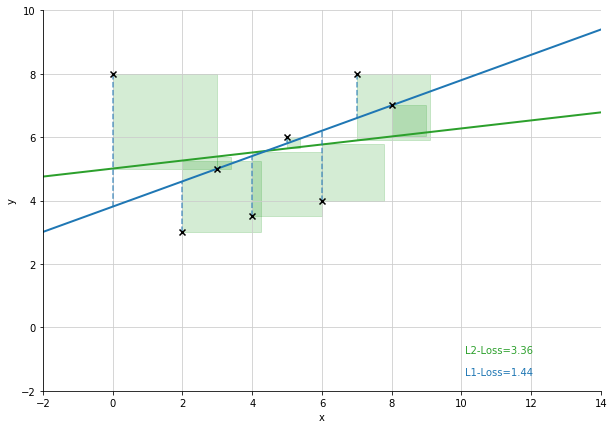

In [24]:
from scipy.optimize import minimize

#toy data
x = np.array([0,2,3,4,5,6,7,8])
y = np.array([8, 3, 5, 3.5, 6, 4, 8, 7])

#create design matrix X including rows of 1's for bias
X = np.column_stack([np.ones(len(x)),x])

#compute l2-loss
def l2loss(X,y,betas):
    return (np.dot(X,betas)-y)**2

def emperical_risk_l2(betas,X,y):
    return 1/len(y) * l2loss(X,y,betas).sum()

#compute l1-loss
def l1loss(X,y,betas):
    return np.absolute(np.dot(X,betas)-y)

def emperical_risk_l1(betas,X,y):
    return 1/len(y) * l1loss(X,y,betas).sum()

#generate figure
fig = pl.figure(figsize=(10,7))
ax = fig.add_subplot(111)

#plot toy data 
ax.scatter(x,y,marker="x",zorder=100,color="k")
ax.set_ylim(-2,10)
ax.set_xlim(-2,14)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#generate some x data to plot linear model for random betas
n = 10000
xp = np.column_stack([np.ones(n),np.linspace(-2,14,n)])
#estimate optimal betas using l2-loss
betas = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)
#estimate y values for regression line
yp = np.dot(xp,betas)
ax.plot(xp[:,1],yp,linewidth=2,color="tab:green")
ax.grid(color="#CCCCCC")
#pl.title("Optimal beta0 = %.3f, beta1 = %.3f" % (betas[0],betas[1]))

#Compute loss for random betas
loss_v = l2loss(X,y,betas)
sse = emperical_risk_l2(betas,X,y)
#print("L2-Loss: " + str(sse))
#Add text to plot
ax.text(10.1,-0.8,"L2-Loss=%.2f" % (sse),color="tab:green")

for i in range(len(loss_v)):
    # Create a Rectangle patch
    rect = patches.Rectangle((x[i],y[i]),np.abs(np.dot(X,betas)[i]-y[i]),np.dot(X,betas)[i]-y[i],linewidth=1,
                             edgecolor="tab:green",facecolor="tab:green",alpha=0.2)
    # Add the patch to the Axes
    ax.add_patch(rect)


#plot l1-loss
#estimate optimal betas using l1-loss and numerical solver conjugate gradient
#initialize some start betas
betas = np.array([1,1])
result = minimize(emperical_risk_l1, betas, args=(X,y),
                  method='CG', options={'maxiter': 500})

betas_hat = result.x
l1losses = l1loss(X,y,betas_hat)
l1 = emperical_risk_l1(betas_hat,X,y)

#estimate y values for regression line
yp = np.dot(xp,betas_hat)
ax.plot(xp[:,1],yp,linewidth=2,color="tab:blue")
ax.grid(color="#CCCCCC")

#Add text to plot
ax.text(10.1,-1.5,"L1-Loss=%.2f" % (l1),color="tab:blue")

for i in range(len(l1losses)):
    dist = l1losses[i]
    if y[i]<np.dot(X,betas_hat)[i]: #f(x[i],beta0=betas_hat[0],beta1=betas_hat[1]):
        dist = y[i]+dist
    else:
        dist = y[i]-dist
    pl.plot([x[i],x[i]],[y[i],dist],color="tab:blue",alpha=0.7,linestyle="dashed")
print(betas_hat)

# 3D Surface of L1-Loss

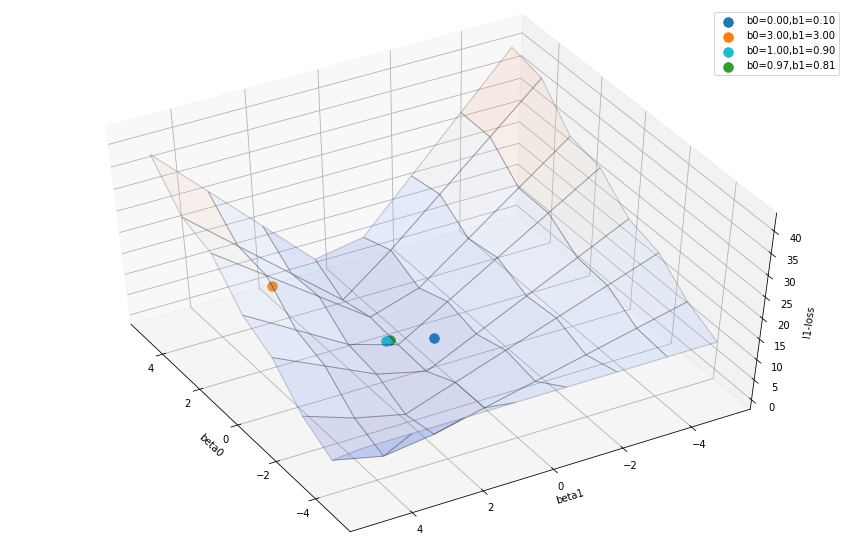

In [7]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly.tools as tls
init_notebook_mode(connected=True)

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib as mlp

#create grid of beta0 and beta1 values
n = len(x)
betas0 = np.linspace(-5,5,n)
betas1 = np.linspace(-5,5,n)
betas0, betas1 = np.meshgrid(betas0, betas1)

#compute l1-loss surface
losses = np.absolute((betas0+betas1*x)-y)

fig = pl.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(betas0,betas1,losses,alpha=0.2,cmap="coolwarm",vmin=0,vmax=50,edgecolor="k",zorder=-10)
ax.set_xlabel("beta0")
ax.set_ylabel("beta1")
ax.set_zlabel("l1-loss")
ax.view_init(50, 150)

#add three example points from the losses before
for b0,b1,c in zip([0,3,1,0.97314131],[0.1,3,0.9,0.80527449],["tab:blue","tab:orange","tab:cyan","tab:green"]):
    loss = emperical_risk_l1(np.array([b0,b1]),X,y)
    ax.scatter(b0,b1,loss,color=c,edgecolor=c,s=90,zorder=100000,label="b0=%.2f,b1=%.2f" % (b0,b1))
pl.legend()

## Interactive 3 Surface Plot

In [8]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly.tools as tls
init_notebook_mode(connected=True)

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib as mlp

#toy data
x = np.array([0,2,3,4,5,6,7,8])
y = np.array([-1, 3, 5, 3.5, 6, 4, 8, 6])

#create design matrix X including rows of 1's for bias
X = np.column_stack([np.ones(len(x)),x])

#create grid of beta0 and beta1 values
n = 8
betas0 = np.linspace(-3,4,n)
betas1 = np.linspace(-3,4,n)
betas0, betas1 = np.meshgrid(betas0, betas1)

#compute estimated ys using real betas
real_betas = np.array([0.623,0.843])

xs = np.linspace(-10,10,n)
ys = real_betas[0] + real_betas[1]*xs

#compute l2-loss surface
losses = ((betas0+betas1*x)-y)**2

db_pl = Surface(x=betas0,y=betas1,z=losses,
                opacity=0.4,
                autocolorscale=True,
                showscale=False,
                cauto=True,
                showlegend=False,
                contours = {
                    "x": {"show": True, "size": 0.04},
                    "z": {"show": True, "size": 0.05},
                    "y": {"show": True, "size": 0.05}
                },)

plotData = [db_pl]


#add three example points from the losses before
for b0,b1,c in zip([0,3,1,0.623],[0.1,3,0.9,0.843],["tab:blue","tab:orange","tab:cyan","tab:green"]):
    loss = emperical_risk_l2(np.array([b0,b1]),X,y)

    point = Scatter3d(x = [b0], y = [b1], z = [loss],
                      mode = 'markers', name="b0=%.2f, b1=%.2f" % (b0,b1),
                      marker=dict(opacity=0.5,size=5,line=dict(width=1,
                                        color='DarkSlateGrey')))
    plotData.append(point)

layout = dict(title=None,
      font=dict(family='Optima', size=15, color='#7f7f7f'),
      margin=Margin(l=0,r=0,b=0,t=50,),
      scene = dict(
        xaxis = dict(
            title='Beta 0'),
        yaxis = dict(
            title='Beta 1'),
        zaxis = dict(
            title='L2-Loss'),),
     )

fig = dict(data=plotData,layout=layout)
iplot(fig,show_link=False)

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




## Interactive L1-Loss Surface

In [9]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly.tools as tls
init_notebook_mode(connected=True)

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib as mlp

#toy data
x = np.array([0,2,3,4,5,6,7,8])
y = np.array([-1, 3, 5, 3.5, 6, 4, 8, 6])

#create design matrix X including rows of 1's for bias
X = np.column_stack([np.ones(len(x)),x])

#create grid of beta0 and beta1 values
n = 8
betas0 = np.linspace(-3,4,n)
betas1 = np.linspace(-3,4,n)
betas0, betas1 = np.meshgrid(betas0, betas1)

#compute estimated ys using real betas
real_betas = np.array([0.97314131, 0.80527449])
xs = np.linspace(-10,10,n)
ys = real_betas[0] + real_betas[1]*xs

#compute l1-loss surface
losses = np.absolute((betas0+betas1*x)-y)

db_pl = Surface(x=betas0,y=betas1,z=losses,
                opacity=0.4,
                autocolorscale=True,
                showscale=False,
                cauto=True,
                showlegend=False,
                contours = {
                    "x": {"show": True, "size": 0.04},
                    "z": {"show": True, "size": 0.05},
                    "y": {"show": True, "size": 0.05}
                },)

plotData = [db_pl]


#add three example points from the losses before
for b0,b1,c in zip([0,3,1,0.97314131],[0.1,3,0.9,0.80527449],["tab:blue","tab:orange","tab:cyan","tab:green"]):
    loss = emperical_risk_l1(np.array([b0,b1]),X,y)

    point = Scatter3d(x = [b0], y = [b1], z = [loss],
                      mode = 'markers', name="b0=%.2f, b1=%.2f" % (b0,b1),
                      marker=dict(opacity=0.5,size=5,line=dict(width=1,
                                        color='DarkSlateGrey')))
    plotData.append(point)

layout = dict(title=None,
      font=dict(family='Optima', size=15, color='#7f7f7f'),
      margin=Margin(l=0,r=0,b=0,t=50,),
      scene = dict(
        xaxis = dict(
            title='Beta 0'),
        yaxis = dict(
            title='Beta 1'),
        zaxis = dict(
            title='L2-Loss'),),
     )

fig = dict(data=plotData,layout=layout)
iplot(fig,show_link=False)

## 3D-Surface for large linear dataset

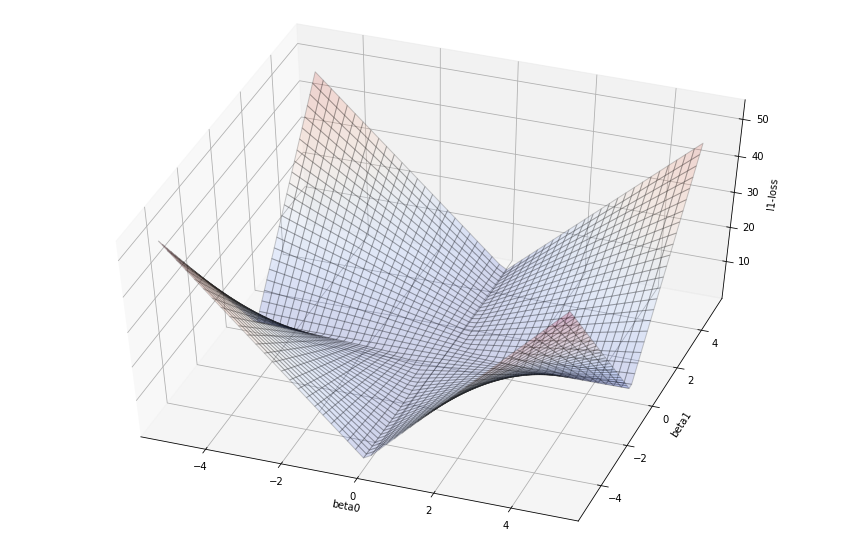

In [10]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly.tools as tls
init_notebook_mode(connected=True)

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib as mlp

#create grid of beta0 and beta1 values
n = 50
betas0 = np.linspace(-5,5,n)
betas1 = np.linspace(-5,5,n)
betas0, betas1 = np.meshgrid(betas0, betas1)

#compute estimated ys using real betas
real_betas = np.array([0.623,0.843])
xs = np.linspace(-10,10,n)
ys = real_betas[0] + real_betas[1]*xs

#compute l1-loss surface
losses = np.absolute((betas0+betas1*xs)-ys)

fig = pl.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(betas0,betas1,losses,alpha=0.2,cmap="coolwarm",vmin=0,vmax=50,edgecolor="k",zorder=-10)
ax.set_xlabel("beta0")
ax.set_ylabel("beta1")
ax.set_zlabel("l1-loss")
ax.view_init(50, 290)


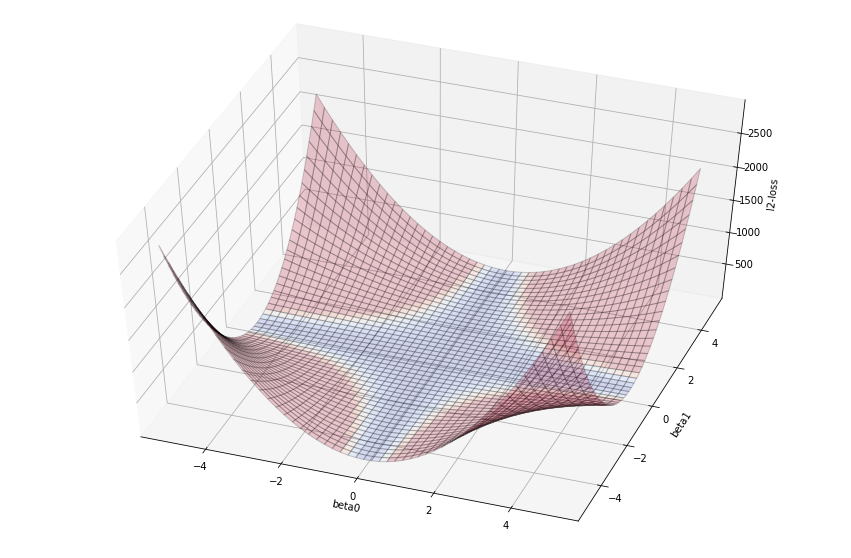

In [11]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly.tools as tls
init_notebook_mode(connected=True)

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib as mlp

#create grid of beta0 and beta1 values
n = 50
betas0 = np.linspace(-5,5,n)
betas1 = np.linspace(-5,5,n)
betas0, betas1 = np.meshgrid(betas0, betas1)

#compute estimated ys using real betas
real_betas = np.array([0.623,0.843])
xs = np.linspace(-10,10,n)
ys = real_betas[0] + real_betas[1]*xs

#compute l1-loss surface
losses = ((betas0+betas1*xs)-ys)**2

fig = pl.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(betas0,betas1,losses,alpha=0.2,cmap="coolwarm",vmin=0,vmax=50,edgecolor="k",zorder=-10)
ax.set_xlabel("beta0")
ax.set_ylabel("beta1")
ax.set_zlabel("l2-loss")
ax.view_init(50, 290)
